In [29]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [30]:
#Set style for matplotlib
plt.style.use('ggplot')

In [31]:
#Set options for pandas
pd.options.display.max_columns =1_000
pd.set_option('display.max_rows', 1_000)

#Surpress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [32]:
#Read in data

path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\04_Models'

#Read in listings data
listings = pd.read_csv(path + '/01_19_2020_Listings_Processed.csv',  index_col=0)

#Ordinal variables to convert to category
ordinals = ['review_scores_accuracy', 'review_scores_checkin','review_scores_cleanliness', 
            'review_scores_communication','review_scores_location','review_scores_rating',
            'review_scores_value']

#Convert 
listings[ordinals] = listings[ordinals].astype('category')

# Preview Data

In [33]:
print('Listings shape: ', listings.shape)
listings.head()

Listings shape:  (65767, 469)


,accommodates,availability_30,availability_365,bathrooms,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,cleaning_fee,extra_people,guests_included,host_identity_verified,host_is_superhost,host_response_rate,instant_bookable,is_location_exact,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,price,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,total_amenities,24-hour,Accessible-height,Air,Amazon,BBQ,Baby,Babysitter,Balcony,Bath,Bathroom,Bathtub,Beach,Beachfront,Bed,Bedroom,Bidet,Body,Breakfast,Building,Buzzer/wireless,Cable,Carbon,Cat(s),Ceiling,Central,Changing,Children’s,Cleaning,Coffee,Convection,Cooking,Crib,DVD,Day,Disabled,Dishes,Dishwasher,Dog(s),Doorman,Double,Dryer,Echo,Electric,Elevator,Espresso,Essentials,Ethernet,Exercise,Extra,Family/kid,Fax,Fire,Fireplace,Firm,First,Fixed,Flat,Formal,Free,Full,Game,Garden,Gas,Ground,Gym,HBO,Hair,Hammock,Handheld,Hangers,Heat,Heated,Heating,High,High-resolution,Host,Hot,Indoor,Internet,Iron,Jetted,Keypad,Kitchen,Kitchenette,Lake,Laptop,Lock,Lockbox,Long,Luggage,Memory,Microwave,Mini,Mobile,Mountain,Mudroom,Murphy,Netflix,Other,Outdoor,Outlet,Oven,Pack,Paid,Patio,Pets,Pillow-top,Play/travel,Pocket,Pool,Printer,Private,Projector,Rain,Refrigerator,Roll-in,Room-darkening,Safety,Self,Shampoo,Shared,Shower,Single,Ski-in/Ski-out,Smart,Smoke,Smoking,Soaking,Sound,Stair,Stand,Standing,Step-free,Stove,Suitable,Sun,Table,Tennis,Terrace,Toilet,Walk-in,Warming,Washer,Waterfront,Well-lit,Wheelchair,Wide,Wifi,Window,Wine,access,accessible,aid,air,allowed,alone,and,area,around,backyard,balcony,bars,basics,bath,bathroom,bed,bedroom,before,blankets,books,card,chair,charger,check-in,checkout,clearance,comforts,computer,conditioning,connection,console,cooler,corner,court,covers,crib,detector,dining,dinnerware,door,doorway,drawer,dropoff,dryer,en.hosting_amenity_49,en.hosting_amenity_50,enter,entrance,entryway,equipment,essentials,events,extinguisher,fan,fireplace,floor,floors,foam,for,fridge,friendly,front,gates,grab,greets,grill,guards,guest,guests,gym,hallway,hallways,head,hoist,home,hot,intercom,kettle,kit,kitchen,lamps,level,linens,live,living,lock,loungers,machine,maker,mattress,missing:,monitor,monoxide,off,oven,paper,parking,path,pet(s),pillows,pit,player,pool,premises,profiling,property,rack,recommendations,room,screen,seating,shades,shower,silverware,soap,space,spot,staff,stairs,stays,steam,steps,street,suite,system,table,term,this,toilet,towel,toys,translation,tub,valet,view,water,wifi,with,workspace,you,None,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,photographer,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,host_identity_verified.1,host_is_superhost.1,instant_bookable.1,is_location_exact.1,require_guest_phone_verification.1,require_guest_profile_picture.1,requires_license.1,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Daly City,city_San Francisco,city_South San Francisco,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,market_San Francisco,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Glen Park,neighbourhood_c

# Split Data into Training and Test Sets

In [34]:
#Prepare data for splitting into train and test sets
X= listings.drop(columns='price').values
y= listings['price'].values

#Check shapes
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (65767, 468)
y shape:  (65767,)


In [35]:
#Import models
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.model_selection import train_test_split

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42)

#Check shapes
print('Training data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))

Training data shape: (49325, 468)
Test data shape: (16442, 468)


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [36]:
#Import models
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Feature Selection

## Import libraries

In [37]:
#Import ...
#Scaler
from sklearn.preprocessing import StandardScaler

#Feature_selection models
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2,VarianceThreshold

#Remove low variance features
from sklearn.ensemble import ExtraTreesRegressor

#Pipeline
from sklearn.pipeline import Pipeline

#CV
from sklearn.model_selection import cross_validate

## Initial preprocessing pipeline

In [38]:
feature_importance = ExtraTreesRegressor(n_estimators=50, n_jobs=-1,verbose=1,#
                                        random_state=42)

#Create pipeline that scales data, removes low variance feats and extracts feat importances
feature_pipe = Pipeline(steps = [('Normalizer', StandardScaler()),#Step1. Normalize training data
    ('Variance_Selector', VarianceThreshold(threshold=(.8 * (1 - .8)))),#Step2.Remove low variance features
    ('Feature_Importances',feature_importance)]) #Step3.View Feature Importances

#Fit to data
feature_pipe.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.8s finished


Pipeline(memory=None,
         steps=[('Normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Variance_Selector',
                 VarianceThreshold(threshold=0.15999999999999998)),
                ('Feature_Importances',
                 ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=50, n_jobs=-1,
                                     oob_score=False, random_state=42,
                                     verbose=1, warm_start=False))],
         verbose=False)

## Feature Importances from Initial preprocessor pipeline

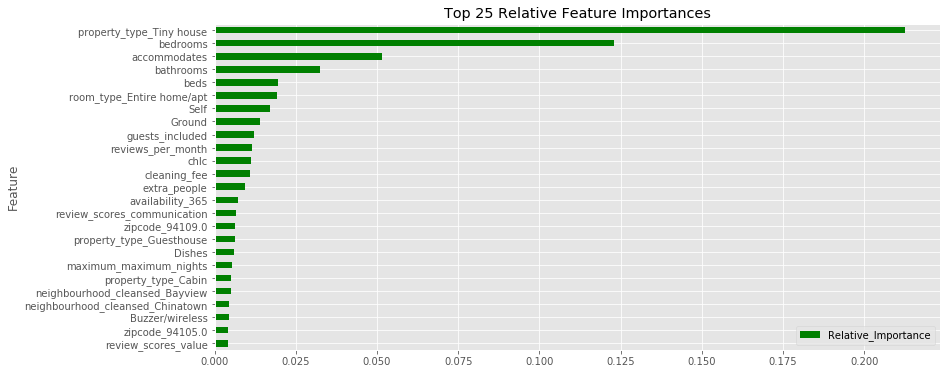

In [39]:
def feature_importance_viz(cols, ft_importances, feat_count, figsize):
    df = pd.DataFrame(list(zip(cols,ft_importances)), columns = ['Feature', 'Relative_Importance'])
    top50 = df.sort_values(by = 'Relative_Importance', ascending = False).head(feat_count)
    ax = top50.plot(kind = 'barh', x='Feature', figsize=figsize,color = 'green') 
    ax.set_title('Top {} Relative Feature Importances'.format(feat_count))
    ax.invert_yaxis()
    
feature_importance_viz(listings.columns, feature_pipe['Feature_Importances'].feature_importances_, 25, (13,6))


## Feature selection and transformation

In [40]:
#Instantiate SelectFromModel using feature_importance
selector = SelectFromModel(feature_importance, threshold='mean')

#Create pipeline 
preprocessor = Pipeline(steps = [('Normalizer', StandardScaler()),#Step1. Normalize training data
    ('Variance_Selector', VarianceThreshold(threshold=(.8 * (1 - .8)))),#Step2.Remove low variance features
    ('Selector',selector)]) #Step3.Select Features that meet threshold

#Fit to data
preprocessor.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.0s finished


Pipeline(memory=None,
         steps=[('Normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Variance_Selector',
                 VarianceThreshold(threshold=0.15999999999999998)),
                ('Selector',
                 SelectFromModel(estimator=ExtraTreesRegressor(bootstrap=False,
                                                               criterion='mse',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_s

In [41]:
#Transform training data
X_train_t = preprocessor.transform(X_train)

#View new training data shape after transformation
print('New training data shape:', X_train_t.shape)

New training data shape: (49325, 82)


# Design base model pipeline

Testing a list of potential regressors that will work well on sparse data. Will optimize best base model.

In [15]:
#Supervised learning techniques
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

#Create list of regression models to iterate over and test in pipeline
regressors = [RandomForestRegressor(random_state = 42, n_jobs=-1), 
              GradientBoostingRegressor(random_state = 42), 
              BaggingRegressor(random_state = 42, n_jobs=-1),
             MLPRegressor(random_state = 42 ),
             DecisionTreeRegressor(random_state = 42)]

In [17]:
#Run base models to see which performs best on training data
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error']

In [17]:
for regressor in regressors:
    pipe = Pipeline(steps=[('Model', regressor)], verbose=False) #Fit regressor
    scores  = cross_validate(pipe,X_train_t, y_train,scoring=scoring, cv =5)
    print('=============================================')
    print(regressor)
    print('Mean R2 Score: ', np.mean(scores['test_r2']))
    print('Mean RMSE Score: ', np.mean(np.sqrt(-1 * scores['test_neg_mean_squared_error'])))
    print('Mean MAE Score: ', np.mean(scores['test_neg_mean_absolute_error']))
    print('=============================================')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
Mean R2 Score:  0.9405028628203164
Mean RMSE Score:  18.96277394368089
Mean MAE Score:  -8.631679875571326
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
  

C:\Users\kishe\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kishe\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kishe\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\kishe\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
Mean R2 Score:  0.8515219234461566
Mean RMSE Score:  29.952143602985764
Mean MAE Score:  -21.026822618824827
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')
Mean R2 Score:  0.8938559295568769
Mean RMSE Sco

RandomForestRegressor will be the model of choice. Let's see if we can reduce that average MSE.

# Tune Hyperparameters

## Random Search

In [42]:
print('Random Forest parameters: ', RandomForestRegressor().get_params)

Random Forest parameters:  <bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>


In [43]:
#Set values for RandomForestRegressor hyperparameters
max_depth = [20, 30, 40]

max_features= ['auto', 'sqrt', 'log2']

n_estimators = [200, 250, 300]

bootstrap=[True, False]

min_samples_split=[6,8, 10]

min_samples_leaf = [1,3,5,7]

param_grid = {'max_depth' : max_depth,
            'max_features':max_features,
            'n_estimators':n_estimators,
            'bootstrap': bootstrap,
              'min_samples_split':min_samples_split,
            'min_samples_leaf' : min_samples_leaf,
}

In [44]:
from sklearn.model_selection import RandomizedSearchCV
RFR_random = RandomizedSearchCV(RandomForestRegressor(random_state = 42, n_jobs=-1), param_distributions= param_grid, n_jobs=-1,
                           scoring = scoring,refit='r2',
                                verbose =1)

print('View random_model parameters: ', RFR_random.get_params)

View random_model parameters:  <bound method BaseEstimator.get_params of RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_sc

In [45]:
#Fit model to data
RFR_random.fit(X_train_t, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.3min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_...


In [46]:
print('Best score from ',RFR_random.best_score_)

print('Best RFR_random params: ', RFR_random.best_params_)

Best score from  0.9288640634702603
Best RFR_random params:  {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [47]:
print('best model parameters: ',RFR_random.best_params_ )
print('Metrics: \nr2: ',np.mean(RFR_random.cv_results_['mean_test_r2']))
print('RMSE: ',np.mean(np.sqrt(-1 * (RFR_random.cv_results_['mean_test_neg_mean_squared_error']))))
print('MAE: ',np.mean(RFR_random.cv_results_['mean_test_neg_mean_absolute_error']))

best model parameters:  {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Metrics: 
r2:  0.8916762572568115
RMSE:  25.45877879159855
MAE:  -15.94746950291405


## Gridsearch

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
#Set values for RandomForestRegressor hyperparameters
max_depth = [25,30,35]

max_features= ['sqrt']

n_estimators = [225,250,275]

bootstrap=[False]

min_samples_split = [5,6]
    
min_samples_leaf = [1,2]

param_grid = {'max_depth' : max_depth,
            'max_features':max_features,
            'n_estimators':n_estimators,
            'bootstrap': bootstrap,
            'min_samples_leaf' : min_samples_leaf,
            'min_samples_split' : min_samples_split
}

In [50]:
#Create GridSearch
RFR_optimized = GridSearchCV(RandomForestRegressor(random_state = 42, n_jobs=-1), param_grid=param_grid,
                        n_jobs= -1, scoring=scoring,refit='r2', verbose=1)

#Fit to data
RFR_optimized.fit(X_train_t, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  9.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth

In [51]:
print('best model parameters: ',RFR_optimized.best_params_ )
print('Metrics: \nr2: ',np.mean(RFR_optimized.cv_results_['mean_test_r2']))
print('RMSE: ',np.mean(np.sqrt(-1 * (RFR_optimized.cv_results_['mean_test_neg_mean_squared_error']))))
print('MAE: ',np.mean(RFR_optimized.cv_results_['mean_test_neg_mean_absolute_error']))



best model parameters:  {'bootstrap': False, 'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Metrics: 
r2:  0.9496894197395529
RMSE:  17.427132843745984
MAE:  -8.469283151036047


## Visualize the results

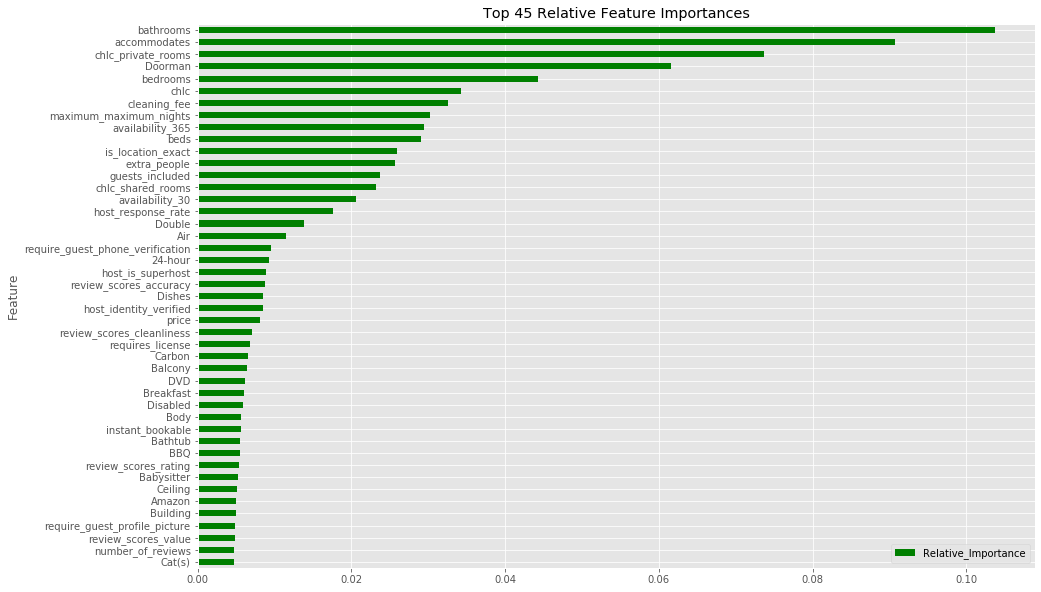

In [52]:
#Plot feature importances    
feature_importance_viz(listings.columns, RFR_optimized.best_estimator_.feature_importances_, 45,(15,10))

# Write Files and Model

In [55]:
from sklearn.externals import joblib

# save the model to disk
filename = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\04_Models\2020_0128_Price_Predictor_Final.sav'
joblib.dump(RFR_optimized, filename)

#Set path to write test data
path =  r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\04_Models'

#Write Test data to csv
pd.DataFrame(X_test).to_csv(path + '/2020_0128_Test_Data.csv', header=None, index=None)
pd.DataFrame(y_test).to_csv(path + '/2020_0128_Test_Labels.csv', header=None, index=None)